# Exploratory Data Analysis 



## Lifecycle

1) Feature engineering : handling missing values. **(pandas)** **(seaborn)**.
* Statistical analysis for the data with seaborn **(seaborn)**.
* Towards data science and medium.
* Kaggle kernels for examples. 
2) Handling categorical features. 
3) Feature selection. **(different types of correlation)**.
4) One hot encoding **(nominal variables)**, label encoding **(ordinal variables)**.

# Example 1 : Titanic Dataset. 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
%matplotlib inline

In [40]:
train = pd.read_csv('./Titanic Dataset/train.csv')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The goal is to predict if the passanger survived or not based on the Survived column. 

# **Missing Data** 

In [42]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Columns which have missing values. 

In [43]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualizing the columns with missing values. 

<AxesSubplot:>

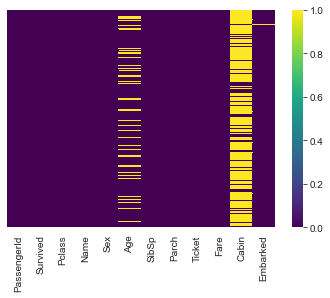

In [44]:
sns.heatmap(train.isnull(),yticklabels= False,cbar=True,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

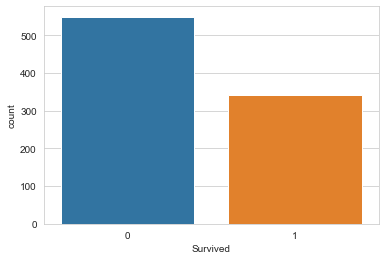

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = train)

### How many man and women survived. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

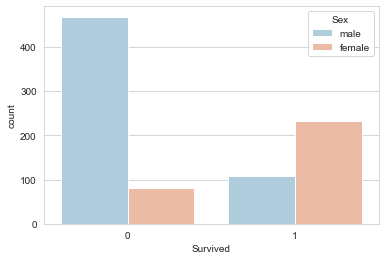

In [46]:
sns.countplot(x ='Survived',hue='Sex',data = train, palette='RdBu_r')

### Survival based on passenger class. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

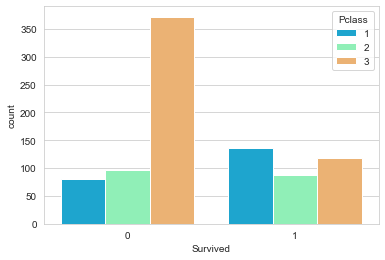

In [47]:
sns.countplot(x ='Survived',hue='Pclass',data = train, palette='rainbow')

### Visualizing the age distribution of the passengers. 

* First we drop the missing values. 

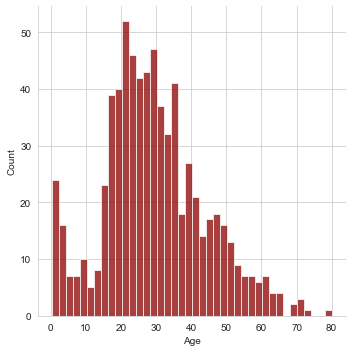

In [48]:
sns.displot(train['Age'].dropna(),kde = False, color = 'darkred', bins = 40 )

<AxesSubplot:>

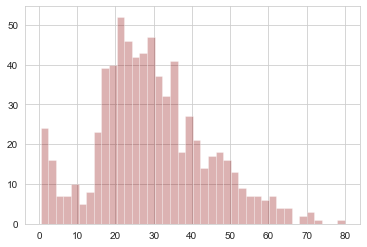

In [49]:
train['Age'].hist(bins= 40, color = 'darkred',alpha = 0.3)

### How many people have siblings or spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

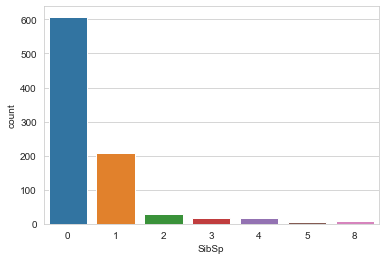

In [50]:
sns.countplot(x = 'SibSp',data = train)

<AxesSubplot:>

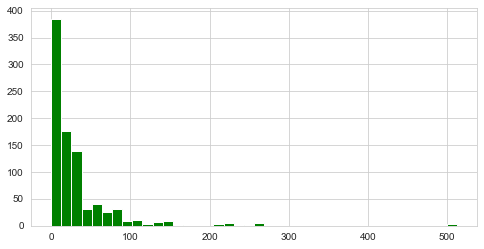

In [51]:
train['Fare'].hist(color ='green',bins=40,figsize=(8,4))

## Data cleaning. 

### What is the relation between passenger class and the age. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

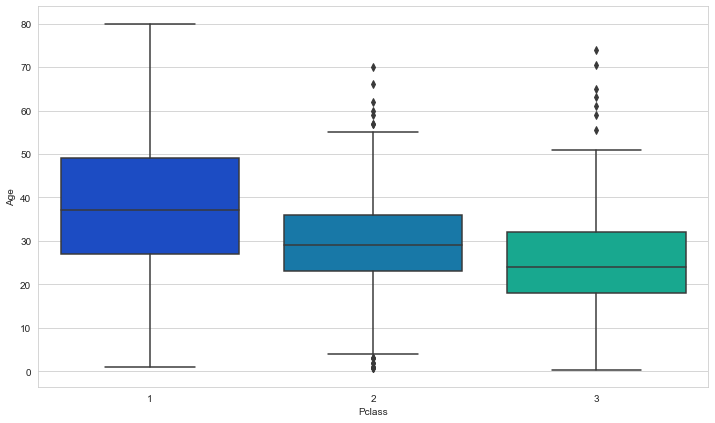

In [52]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette='winter')

In [53]:
age_by_class = train['Age'].groupby(train['Pclass'])

In [54]:
age_by_class.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


## Use the mean value of the age of each class in order to fill the missing values of the age column. 

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass == 2:
            return 29 
        else:
            return 25
    else :
        return Age    

In [56]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis= 1)

<AxesSubplot:>

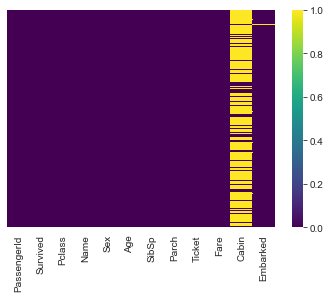

In [57]:
sns.heatmap(train.isnull(),yticklabels= False,cbar=True,cmap='viridis')

## The age column is now with out missing values. 

### For the cabin values we can apply feature engineering but we are going to drop the missing values. 

In [58]:
train.drop('Cabin',axis=1,inplace=True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [62]:
train.dropna(inplace= True)

In [63]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

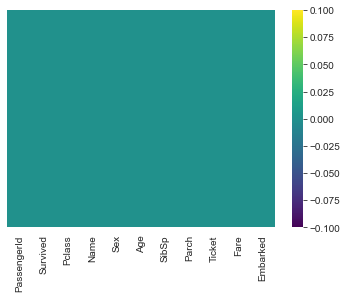

In [64]:
sns.heatmap(train.isnull(),yticklabels= False,cbar=True,cmap='viridis')

# **Categorical Features**.

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Getting the categorical and string columns. 

In [66]:
train.select_dtypes(include=['object'])

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


## Getting the numerical int and float columns. 

In [79]:
train.select_dtypes(include=['int64','float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,25.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [77]:
numerical_columns = train._get_numeric_data().columns
numerical_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [81]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [83]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [84]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1, inplace=True)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [86]:
train = pd.concat([train,sex,embark],axis=1)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [88]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [89]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Finding outliers of a dataset

1. Using the Z-score _(values that falls away of 3 standard deviations are consider as outliers)_
2. Interquantile Range 

In [2]:
import numpy as np

In [18]:
data = [5,4,7,4,8,9,3,10,11,12,1,2,200,190]

In [19]:
def find_outlier(dataset):
    mean = np.mean(data)
    std = np.std(data)
    treshold = 3
    outliers = []
    for i in dataset:
        z_score = (i-mean)/ std
        if np.abs(z_score) > treshold:
            outliers.append(i)
    return outliers 
    

In [20]:
outliers = find_outlier(data)
print(outliers)

[]


## InterQuantile Range 

### Steps:

1. Arrage the data in increasing order

2. Calculate the first (25%) and third quartile (75%)

3. Find interquartile range (q3-q1)

4. Find lower bound q1 * 1.5 

5. Find upper bound q3 * 1.5

In [21]:
quartile1, quartile3 = np.percentile(data,[25,75])

In [22]:
print(quartile1,quartile3)

4.0 10.75


In [23]:
iqr_value = quartile3-quartile1

In [24]:
lower_bound = quartile1-(1.5*iqr_value)
upper_bound = quartile3 + (1.5*iqr_value)

In [25]:
print(lower_bound,upper_bound)

-6.125 20.875


# Normalization and Standarization. 

## Normalization. 
X normalized = X - Xmin / Xmax - Xmin

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',header=None, usecols=[0,1,2])

In [28]:
df.columns = ["Class","Alcohol","Malic"]

In [29]:
df.head()

,Class,Alcohol,Malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [32]:
scaling = MinMaxScaler()

In [33]:
scaling.fit_transform(df[['Alcohol','Malic']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaling = StandardScaler()

In [36]:
scaling.fit_transform(df[['Alcohol','Malic']])

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [40]:
df[['Alcohol','Malic']] = scaling.fit_transform(df[['Alcohol','Malic']])

In [42]:
mean_test = np.mean(df['Alcohol'])
print(mean_test)

-8.382807556720283e-16


In [44]:
std_test = np.std(df['Alcohol'])
print(std_test)

1.0
